### Create 
neural figures for paper

In [1]:
curr_dir = f'/user_data/vayzenbe/GitHub_Repos/hemispace' #CHANGE AS NEEEDED CAUSE ITS FOR VLAAAD

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import hemispace_params as params

#hide warning
import warnings
warnings.filterwarnings("ignore")

import pdb


In [2]:
data_dir = params.data_dir
results_dir = params.results_dir
fig_dir = params.fig_dir

sub_info = params.sub_info
task_info = params.task_info
thresh = params.thresh

suf = params.suf
rois = params.rois
hemis = params.hemis

#load data summary
#data_summary = pd.read_csv(f'{results_dir}/hemispace_summary_vals{suf}.csv')

#load subject info
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')

#extract just patients from group
sub_info = sub_info[sub_info['group']=='patient']

#load mni mask
mni = load_mni152_brain_mask()


EB


XC
KT
SI
FO
BI
KN
BN


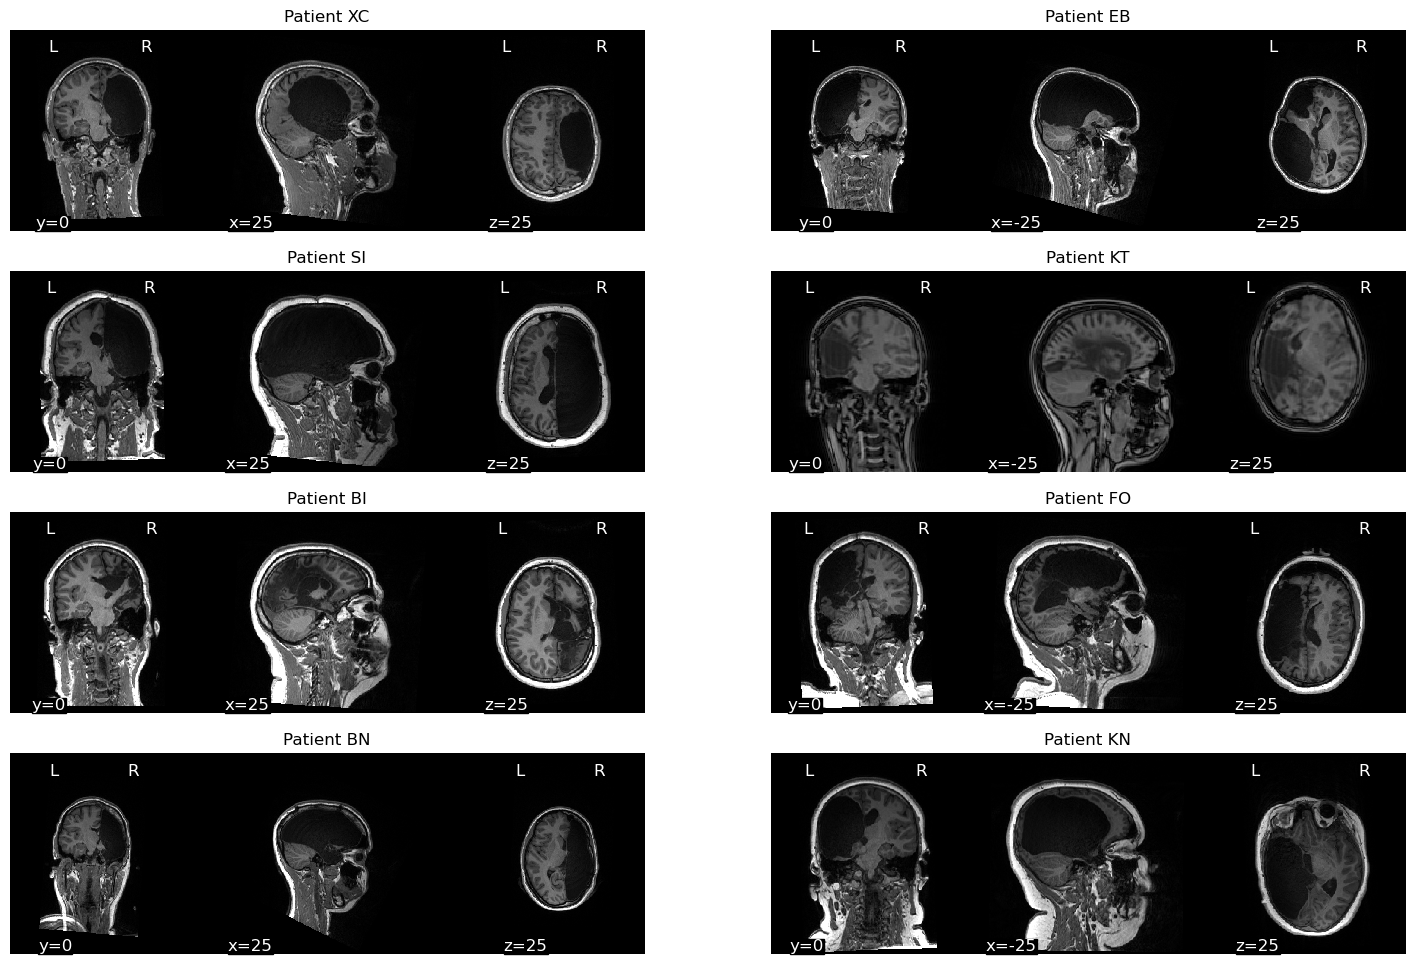

In [4]:
"""
Plot anatomical data 
"""
dim_vals = [-1,-1,.25,-1.25,-1.5,-1.25,-1.25,-1.25]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')
l_row = -1
r_row = -1
n = 0
for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
    print(code)
    sub_dir = f'{data_dir}/{sub}/ses-01'

    if hemi == 'left':
        hemi_col = 0
        l_row = l_row +1
        row = l_row
        xcoord = 25
    else:
        hemi_col = 1
        r_row = r_row + 1
        row = r_row
        xcoord = -25

    #load anatomical data
    anat = image.load_img(f'{sub_dir}/anat/{sub}_ses-01_T1w.nii.gz')

    display = plotting.plot_anat(anat, cut_coords = (xcoord,0,25), draw_cross = False,dim = dim_vals[n],axes=ax[row,hemi_col])

    ax[row,hemi_col].title.set_text(f'Patient {code}')

    n = n+1

#display.savefig(f'{fig_dir}/anatomicals_head.jpg') 
plt.show()
plt.pause(0.0001)

XC
SI
BI
BN
EB
KT
FO
KN


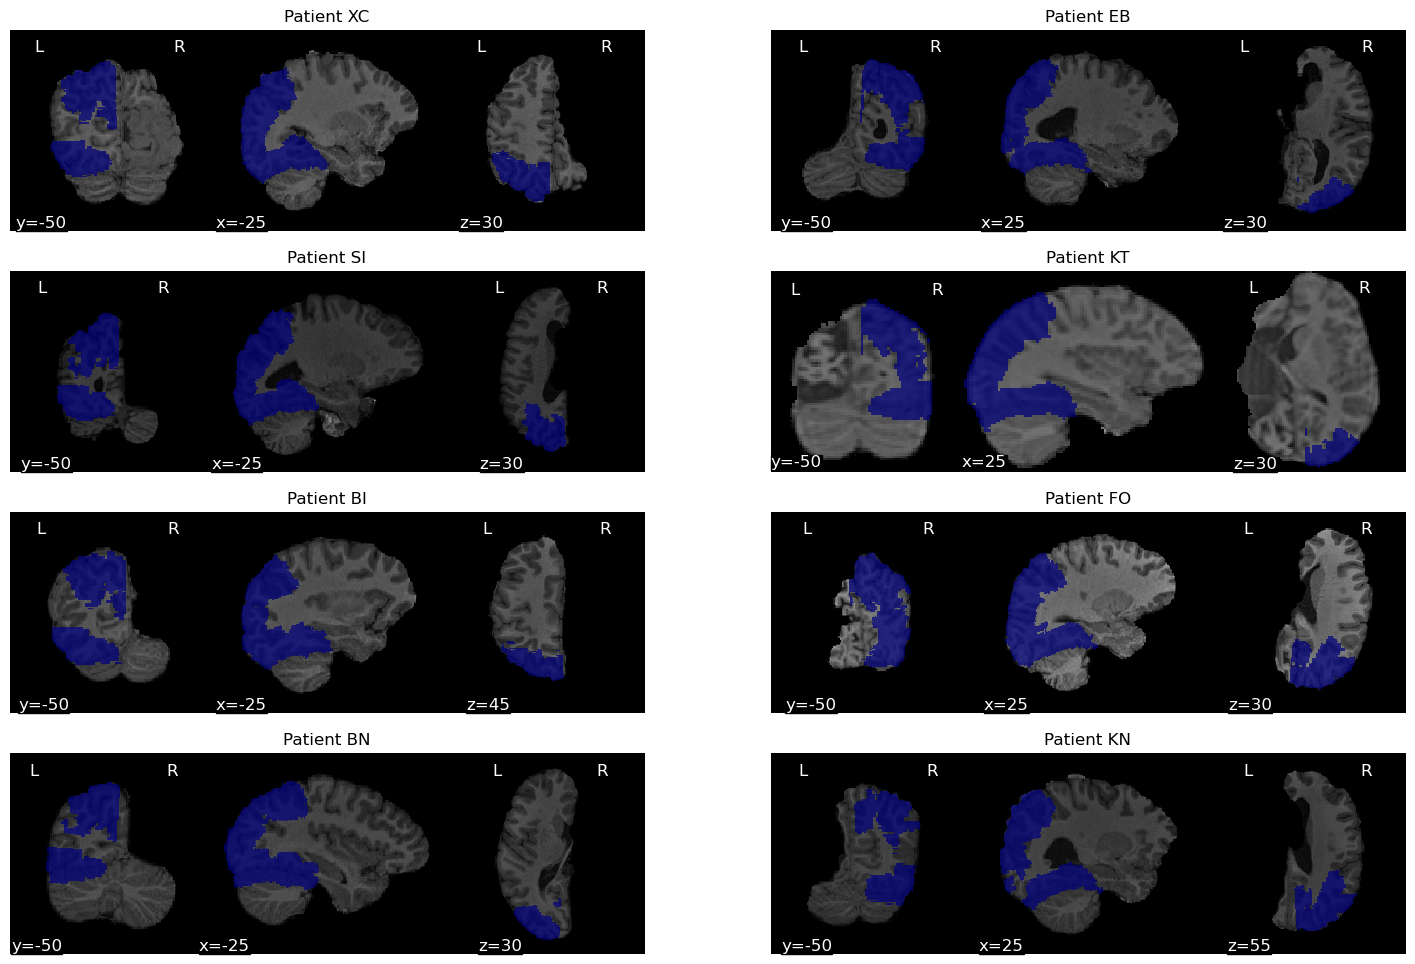

In [15]:
'''
Plot ROIs on each patient
'''
l_row = -1
r_row = -1
n =0
z_coord = [30,30,45,30,30,30,30,55]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')
for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
    print(code)
    sub_dir = f'{data_dir}/{sub}/ses-01'

    if hemi == 'left':
        hemi_col = 0
        l_row = l_row +1
        row = l_row
        xcoord = -25
    else:
        hemi_col = 1
        r_row = r_row + 1
        row = r_row
        xcoord = 25

    #load anatomical
    anat = image.load_img(f'{sub_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz')

    hemi_mask = image.load_img(f'{sub_dir}/anat/{sub}_ses-01_T1w_brain_mask_{hemi}.nii.gz')
    
    #load rois
    ventral_roi = image.load_img(f'{sub_dir}/derivatives/rois/parcels/ventral_visual_cortex.nii.gz')
    dorsal_roi = image.load_img(f'{sub_dir}/derivatives/rois/parcels/dorsal_visual_cortex.nii.gz')

    #combine rois
    roi = image.math_img('a+b', a=ventral_roi, b=dorsal_roi)
    #multiple by hemi mask
    roi = image.math_img('a*b', a=roi, b=hemi_mask)

    #binarize mask
    roi = image.math_img('img > 0', img=roi)

    display = plotting.plot_roi(roi, bg_img = anat,draw_cross = False, cut_coords = (xcoord,-50,z_coord[n]), axes=ax[row,hemi_col])

    ax[row,hemi_col].title.set_text(f'Patient {code}')

    n = n+1

#display.savefig(f'{fig_dir}/anatomicals_head.jpg') 
plt.show()

    



2.58 word


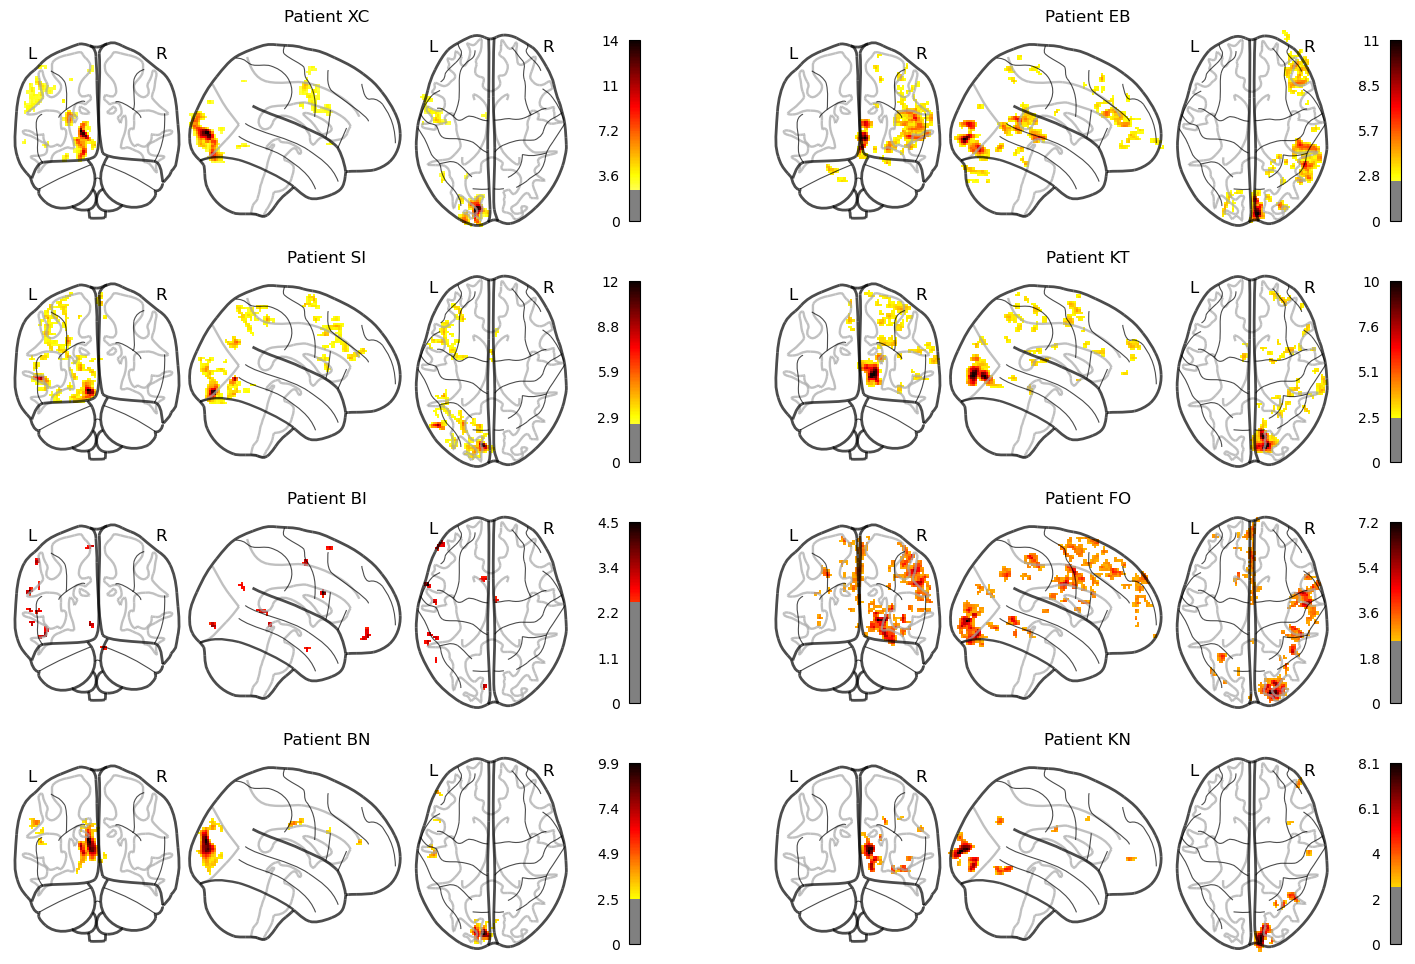

2.58 face


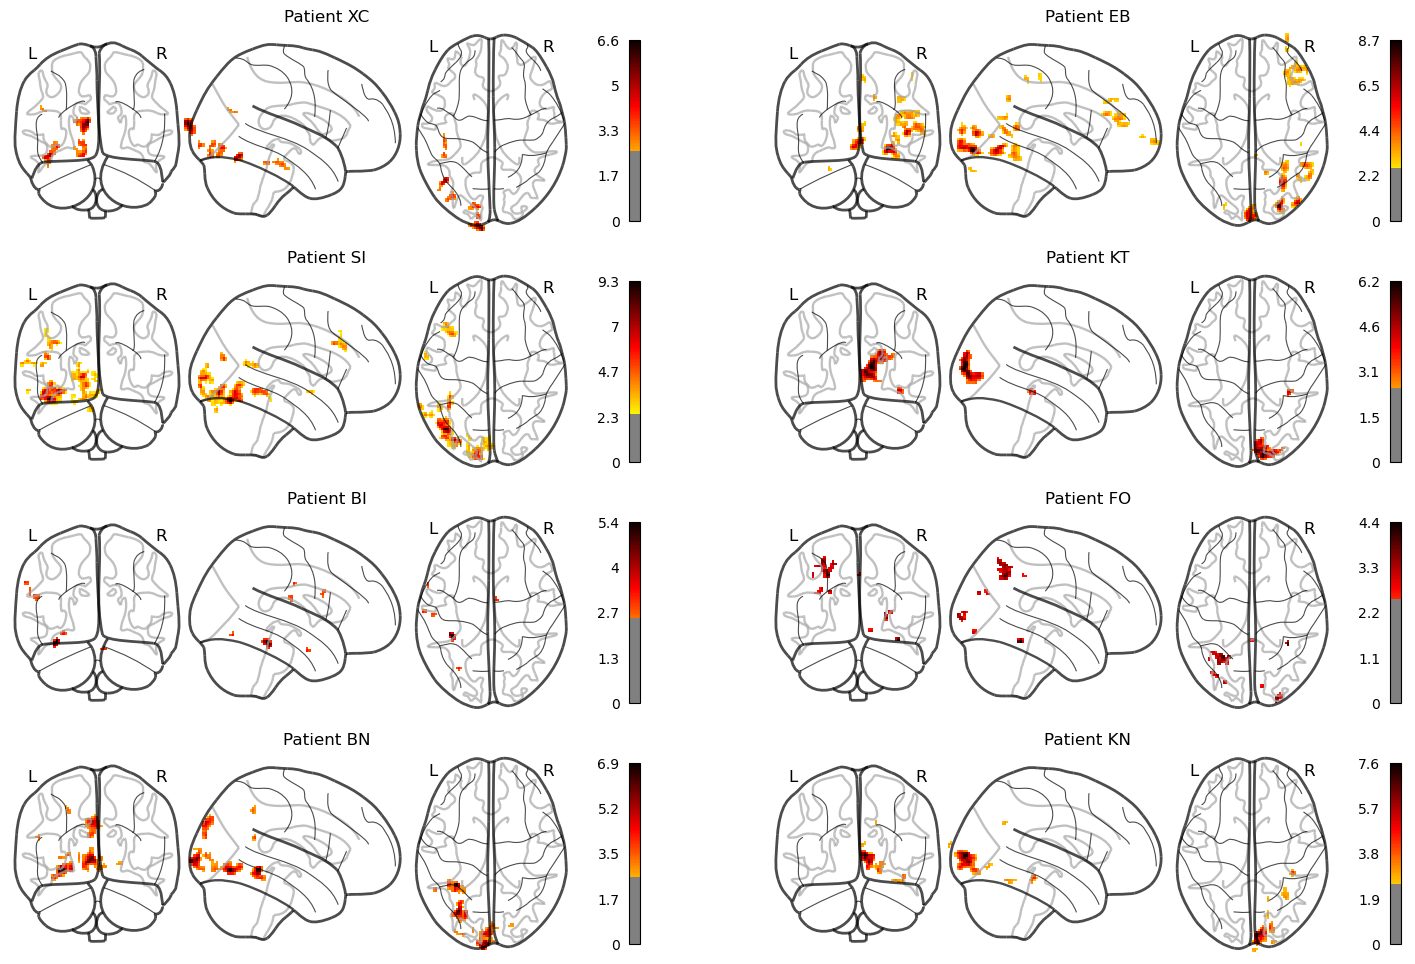

2.58 tool


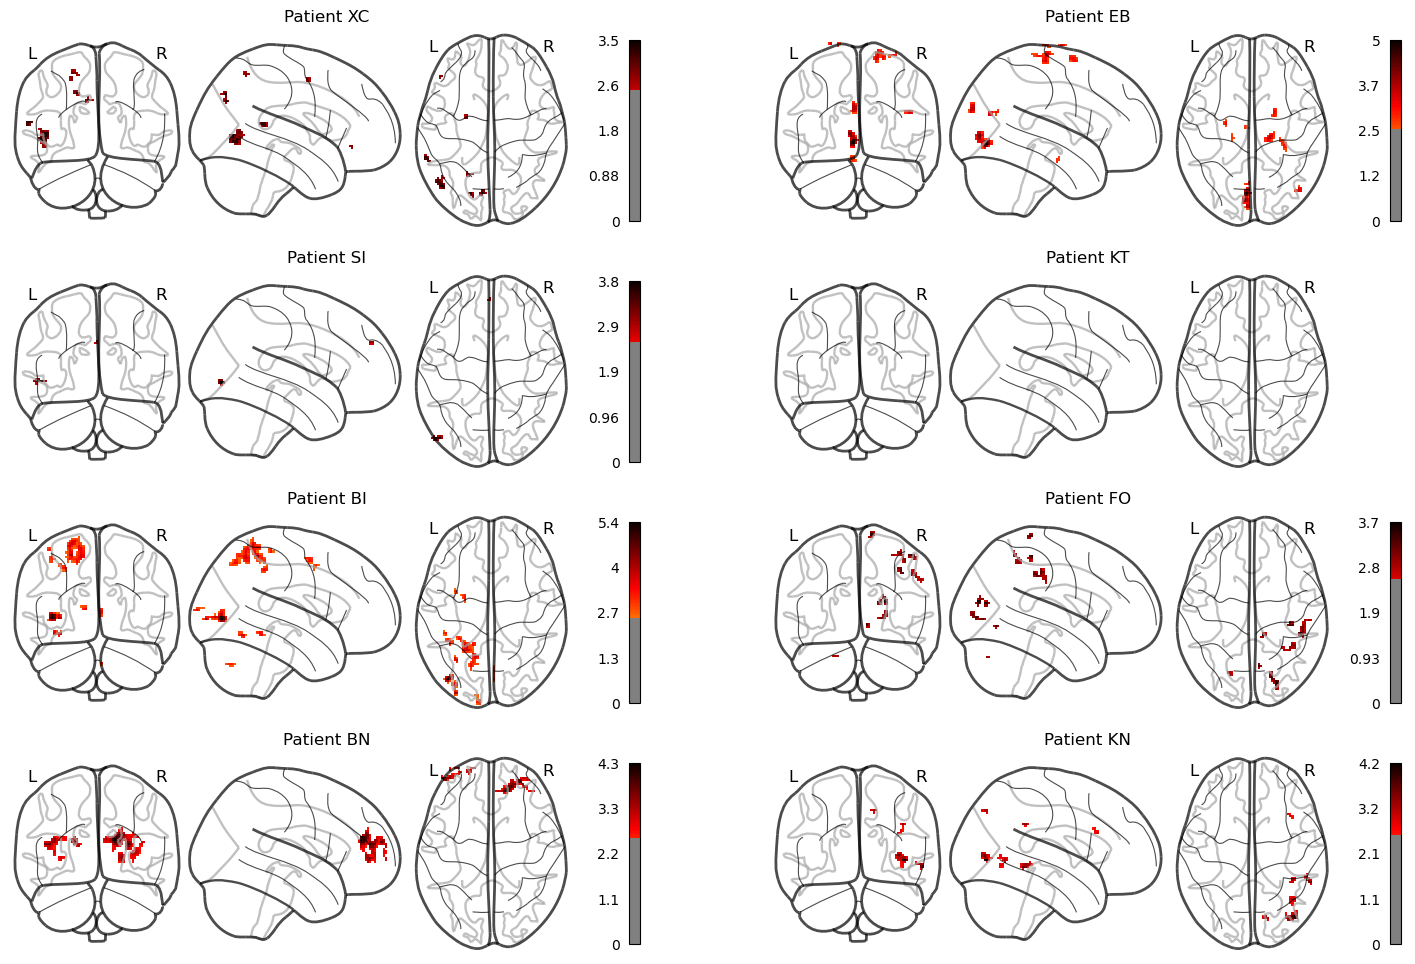

2.58 space


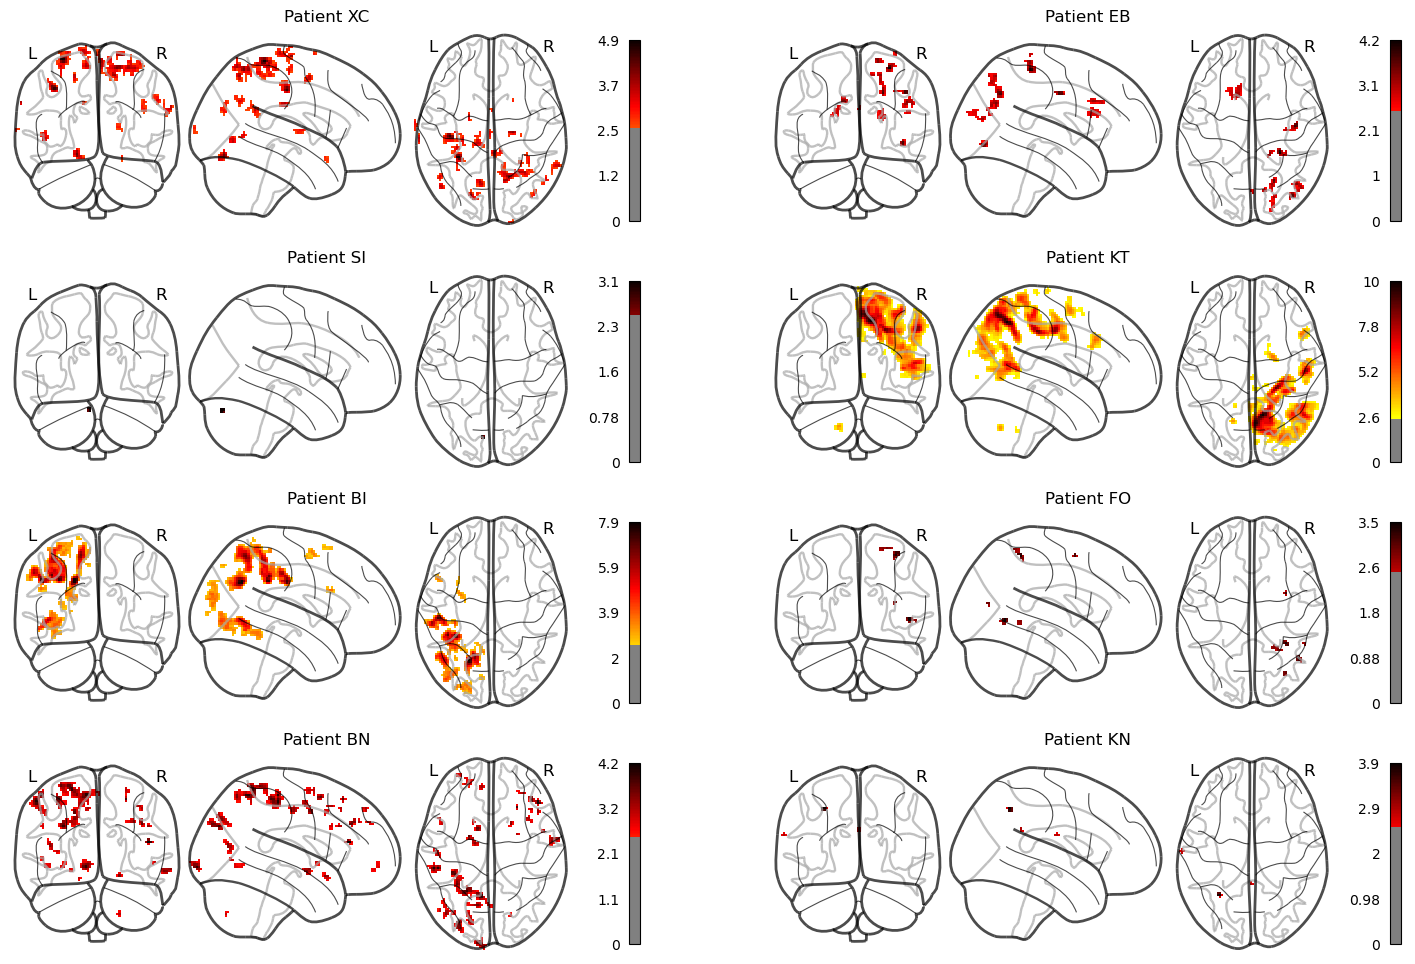

In [3]:
"""
Plot functional data on glass brain
"""

for task,cond, cope in zip(task_info['task'], task_info['cond'],task_info['cope']):
    print(thresh,cond)
    os.makedirs(f'{fig_dir}/glass_brain/{cond}', exist_ok=True)
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
    
    l_row = -1
    r_row = -1
    for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
        sub_dir = f'{data_dir}/{sub}/ses-01'
    
        if hemi == 'left':
            hemi_col = 0
            l_row = l_row +1
            row = l_row
        else:
            hemi_col = 1
            r_row = r_row + 1
            row = r_row
        
        #register each highlevel to anat
        zstat_path = f'{sub_dir}/derivatives/fsl/{task}/HighLevel.gfeat/cope{cope}.feat/stats/zstat1_reg.nii.gz'

        #check if zstat exists
        if os.path.exists(zstat_path):
            #load zstat
            zstat = image.load_img(zstat_path)
            #
            zstat = image.threshold_img(zstat,thresh, cluster_threshold=5, two_sided=False)
            #zstat = image.clean_img(zstat,mask_img=mni)
            #create figure



            display = plotting.plot_glass_brain(zstat, axes=ax[row,hemi_col],threshold = thresh, draw_cross = False, colorbar = True)
            ax[row,hemi_col].title.set_text(f'Patient {code}')

        else:
            display = plotting.plot_glass_brain(mni, axes=ax[row,hemi_col],threshold = thresh, draw_cross = False, colorbar = True)
            ax[row,hemi_col].title.set_text(f'Patient {code}')
            

    display.savefig(f'{fig_dir}/glass_brain/{cond}_glass_brain.png') 
    plt.show()
    plt.pause(0.0001)

              